# **Задача.**

Представьте, что вы работаете археологом и вас интересует анализ результатов раскопок на древнем участке. У вас есть данные о находках артефактов, включая их возраст и материал. Ваши задачи:

Используя NumPy и Pandas, выяснить средний возраст артефактов и медианный возраст.

Разделить артефакты на две категории: "деревянные" и "керамические". Посчитать количество артефактов в каждой категории.

Определить, сколько артефактов было найдено в каждом году, и построить график распределения находок по годам.

Вычислить процентное соотношение керамических артефактов ко всем артефактам.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Инициализируем конфигурационные переменные**


*   **MIN_AGE** - минимальный возраст артефакта
*   **MAX_AGE** - максимальный возраст артефакта
*   **SINCE_DATE** - дата начала раскопок
*   **TO_DATE** - дата конца раскопок





In [ ]:
MIN_AGE = 100
MAX_AGE = 10000

SINCE_DATE = np.datetime64("2024-01-01")
TO_DATE = np.datetime64("2030-01-01")

if TO_DATE <= SINCE_DATE:
    raise "You can't set date lower than tomorrow of SINCE_DATE"

# **Логика создания набора данных**

In [ ]:
start_date = SINCE_DATE
end_date = TO_DATE
dates = np.arange(start_date, end_date, np.timedelta64(np.random.randint(1, 30), 'D'))

ages = np.random.randint(MIN_AGE, MAX_AGE, dates.size)
categories = ["деревянные", "керамические"]


artifacts = pd.DataFrame({'Дата': dates, 'Возраст': ages, 'Категория': [np.random.choice(categories) for _ in range(dates.size)]})
artifacts.head(10)

,Дата,Возраст,Категория
0,2024-01-01,969,деревянные
1,2024-01-08,9758,деревянные
2,2024-01-15,5990,керамические
3,2024-01-22,7421,деревянные
4,2024-01-29,1853,керамические
5,2024-02-05,2704,деревянные
6,2024-02-12,8745,деревянные
7,2024-02-19,8095,деревянные
8,2024-02-26,8505,деревянные
9,2024-03-04,4845,деревянные


# Вывод среднего и медианного возраста артефактов

In [ ]:
mean_age = np.mean(artifacts['Возраст'])
median_age = np.median(artifacts['Возраст'])

print(f'Средний возраст: {mean_age}\nМедианный возраст: {median_age}')

Средний возраст: 4888.748407643312
Медианный возраст: 5024.5


# Подсчет количества артефактов

In [ ]:
wooden_artifacts = artifacts[artifacts['Категория'] == categories[0]]
ceramic_artifacts = artifacts[artifacts['Категория'] == categories[1]]

assert wooden_artifacts.size + ceramic_artifacts.size == artifacts.size

print(f"Количество деревянных артефактов: {wooden_artifacts.size}")
print(f"Количество керамических артефактов: {ceramic_artifacts.size}")

Количество деревянных артефактов: 465
Количество керамических артефактов: 477


# Количество находок по годам

Год 2024: найдено 159 артефактов
Год 2025: найдено 156 артефактов
Год 2026: найдено 156 артефактов
Год 2027: найдено 156 артефактов
Год 2028: найдено 156 артефактов
Год 2029: найдено 159 артефактов


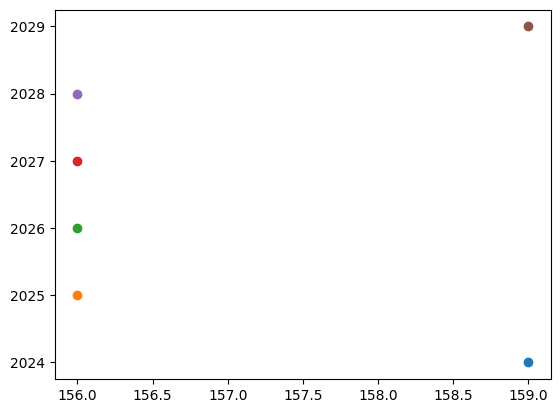

In [ ]:
years = np.unique(dates.astype('datetime64[Y]'))
year_artifacts = artifacts.groupby(artifacts['Дата'].dt.year)

for year_artifact in year_artifacts:
    print(f"Год {year_artifact[0]}: найдено {year_artifact[1].size} артефактов")
    plt.scatter(year_artifact[1].size, year_artifact[0])

plt.show()

# Процентное соотношение керамических артефактов ко всем артефактам

In [ ]:

ceramic_to_all = (ceramic_artifacts.size / artifacts.size) * 100
print(f"Процентное соотношение керамических артефактов ко всем артефактам: {ceramic_to_all}%")

Процентное соотношение керамических артефактов ко всем артефактам: 50.63694267515923%
